In [1]:
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import os
import sys
import re
import pandas as pd 
import glob
import scipy
import scipy.io
from collections import Counter
import scanpy as sc
import gseapy as gp
import h5py
import louvain
import harmonypy as hm
import scrublet as scr
import math
from matplotlib import rcParams
rcParams['figure.figsize'] = 12,12
file_figs = ''
from methods import *
sc.settings.verbosity = 3             # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.logging.print_versions()
sc.settings.set_figure_params(dpi=80)
sc.settings.figdir = '../figures/preproc/'

-----
anndata     0.7.4
scanpy      1.6.0
sinfo       0.3.1
-----
PIL                 8.0.0
anndata             0.7.4
appdirs             1.4.4
backcall            0.2.0
bioservices         1.6.0
brotli              NA
bs4                 4.9.1
cairo               1.19.1
certifi             2020.06.20
cffi                1.14.0
chardet             3.0.4
colorama            0.4.3
colorlog            NA
cycler              0.10.0
cython_runtime      NA
dateutil            2.8.1
decorator           4.4.2
docutils            0.16
easydev             0.10.1
get_version         2.1
gseapy              0.10.1
h5py                2.10.0
harmonypy           NA
html5lib            1.1
idna                2.10
igraph              0.8.2
ipykernel           5.3.4
ipython_genutils    0.2.0
ipywidgets          7.5.1
jedi                0.17.2
joblib              0.16.0
kiwisolver          1.2.0
legacy_api_wrap     1.2
leidenalg           0.8.2
llvmlite            0.34.0
louvain             0.6.1
lxml

In [ ]:
%matplotlib inline
from matplotlib import rcParams
rcParams['figure.figsize'] = 12,12
file_figs = ''
from methods import *
sc.settings.verbosity = 3             # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.logging.print_versions()
sc.settings.set_figure_params(dpi=80)
sc.settings.figdir = '../figures/preproc_reseq/'


samples = [1, 16, 22, 35, 66, 202, 281, 201, 58, 234, 91, 170, 174]
prefix = "../data/all_data/filtered_feature_bc_matrix_"
samples_files = {}
for sample in samples:
    samples_files[sample] = prefix + str(sample) + ".h5"
print(samples_files)
file_name = "preprocessing"
adata = adata_preproc(samples_files, samples, batch_corr = True, max_genes = 6000, 
                    min_genes = 500, min_cells=10,
                    perc_mito = 60, plots = True, 
                    verbose = True, dir_for_figs = file_name, scrublet = 0.10, file_h5 = True, flex_filt = True)
sc.pl.umap(adata, color = ['sample_id', 'leiden'], legend_loc='on data', save= file_name + "leiden.png")
ax = sns.countplot(x="leiden", data=adata.obs, hue="sample_id", log = True)
sc.tl.tsne(adata, n_jobs=16)
plots_markers(adata, markers_dict = "default", save_plots = file_name + "umap.png", dim_type = 'UMAP')
plots_markers(adata, markers_dict = "default", save_plots = file_name + "tsne.png", dim_type = 'tsne')
print(adata.obs.batch.value_counts())
plot_heatmap_markers(adata, file_name)
sc.pl.umap(adata, color = ['sample_id', 'leiden'], legend_loc = 'on data')
sc.pl.tsne(adata, color = ['sample_id', 'leiden'], legend_loc = 'on data')
test = adata.obs.groupby(['leiden', 'sample_id']).size().unstack(fill_value=0)
test.columns = test.columns.astype('str')
test.insert(0, "All", test.sum(axis = 1), True)
test.to_csv("final_preproc.csv")
print(test)

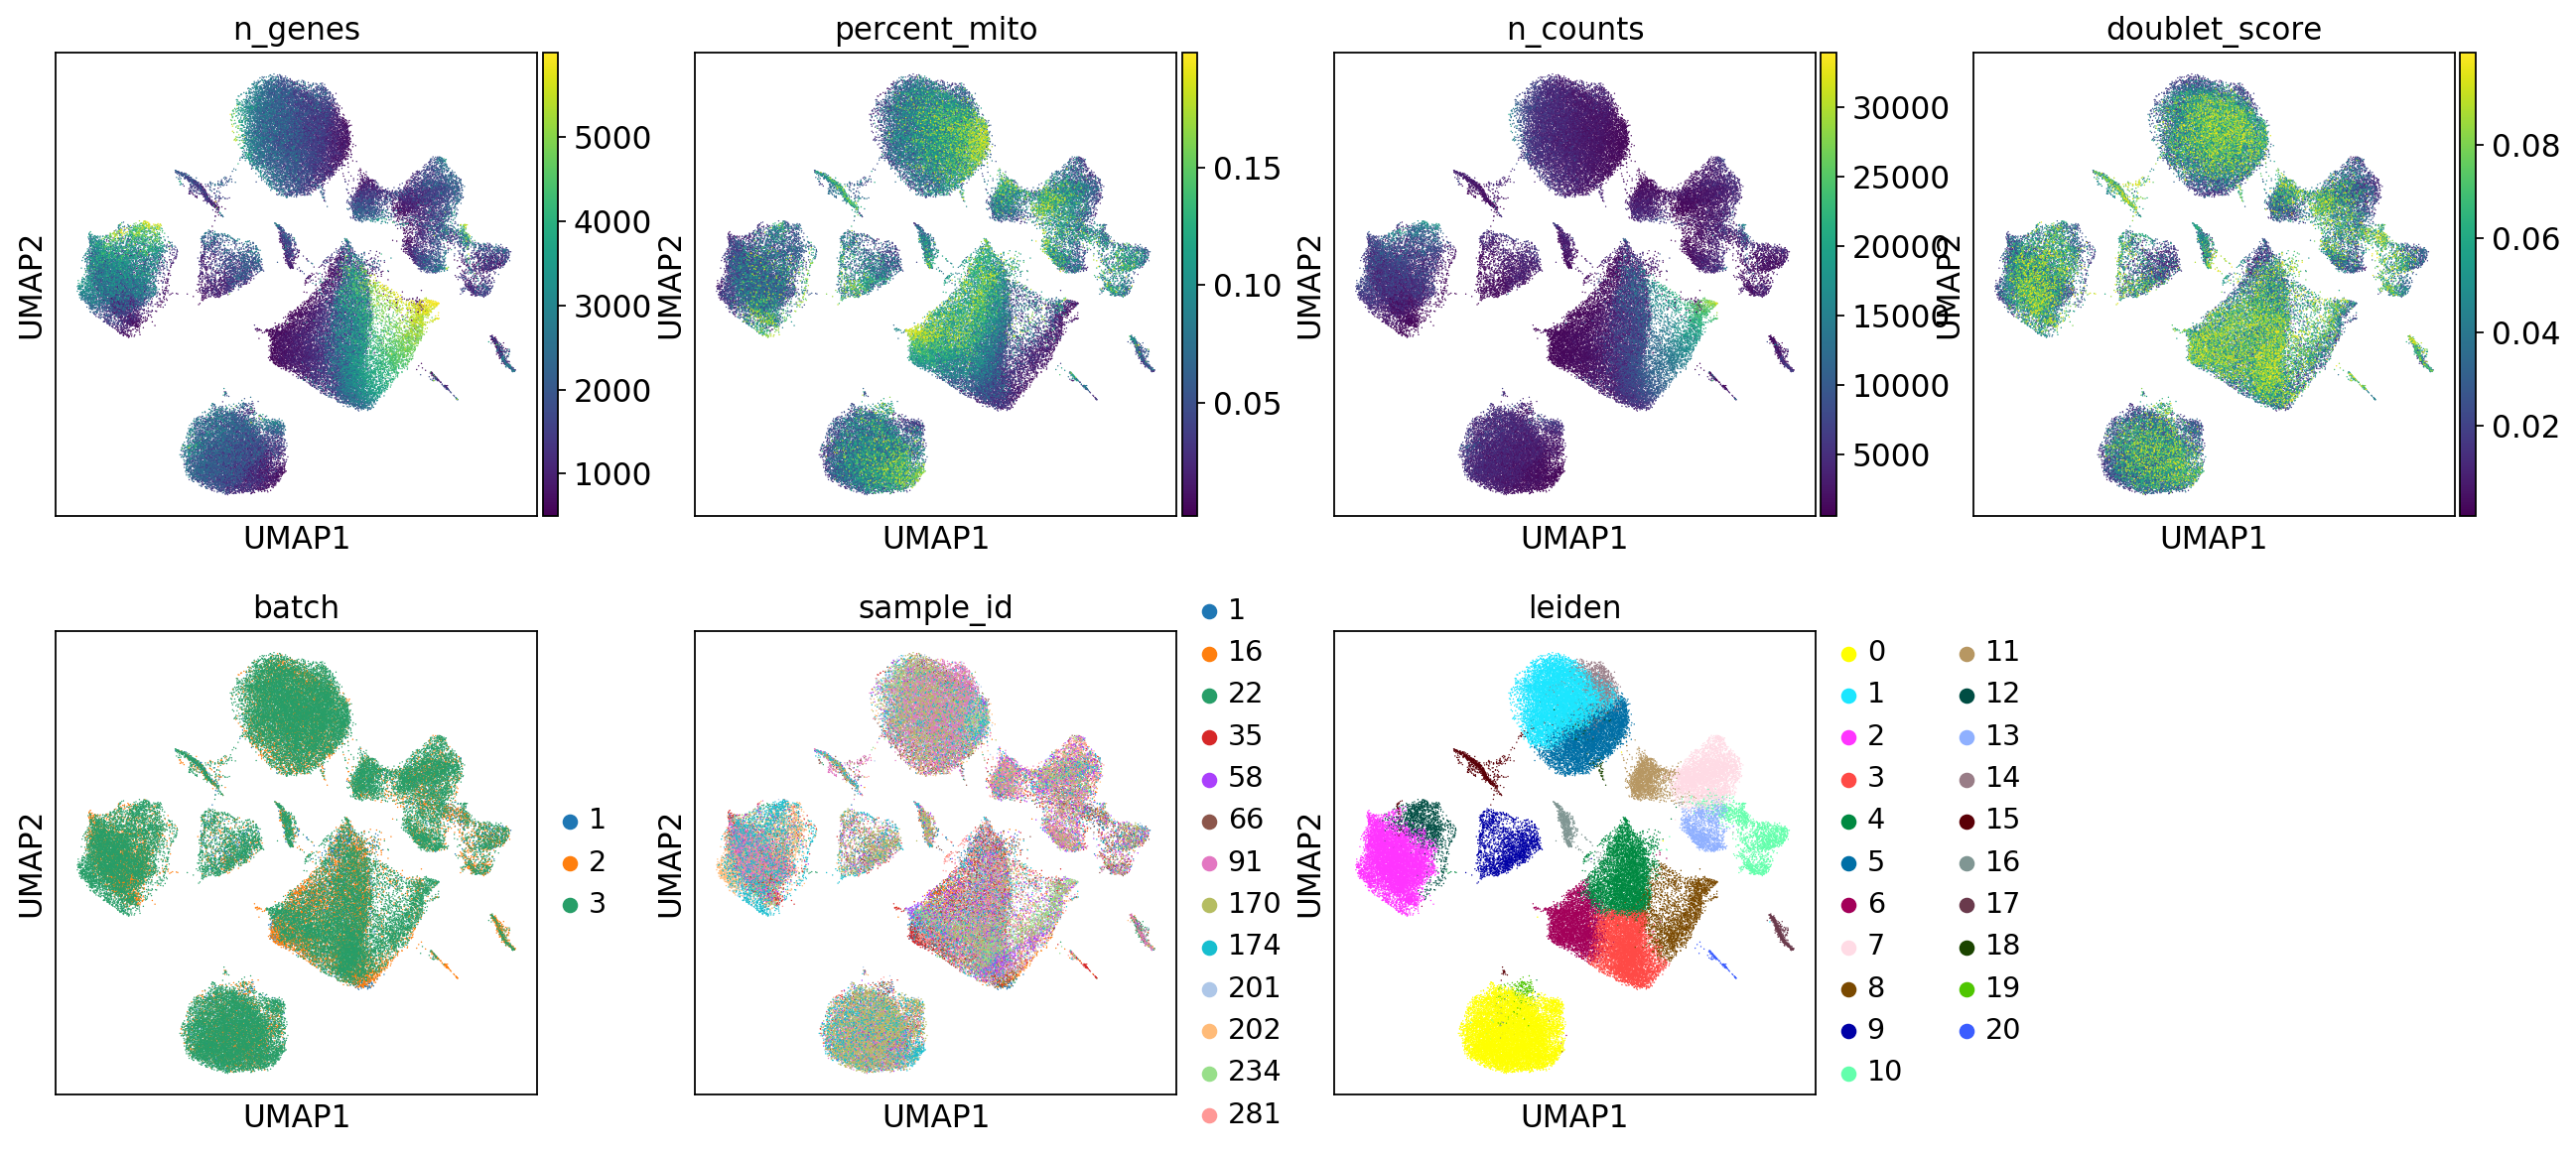

In [6]:
sc.pl.umap(adata, color = ['n_genes', 'percent_mito', 'n_counts', 'doublet_score', 'batch', 'sample_id', 'leiden'])

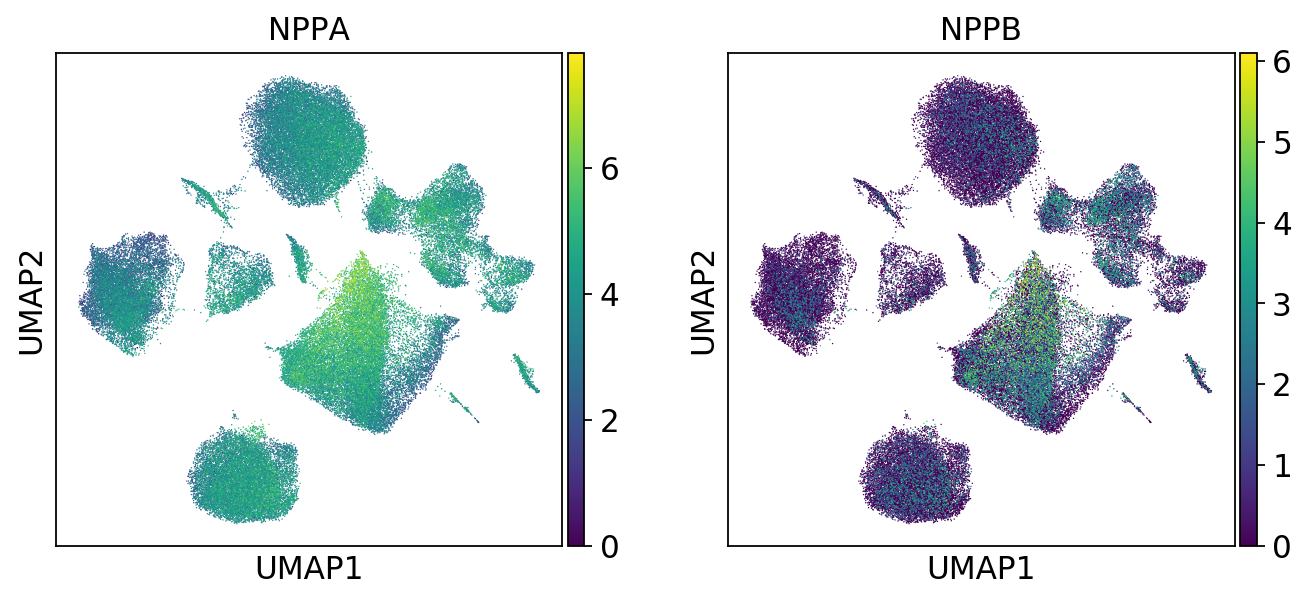

In [7]:
sc.pl.umap(adata, color = ['NPPA', 'NPPB'])

In [8]:
adata.write_h5ad('../h5ad/preproc_60_6000_500_0.1.h5ad')